In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
# Make sure the notebook can import both this repo and ciceroscm
PROJECT_ROOT = Path("..").resolve()
sys.path.insert(0, str(PROJECT_ROOT))
sys.path.insert(0, str(PROJECT_ROOT / "ciceroscm" / "src"))

from plot_utils import plot_training_time_and_speedup, table_for, plot_train_reward, plot_policy_consistency, _extract_lever_table, _extract_adaptation_table, plot_lever_consistency,plot_lever_consistency_mean
from src.policy_consistency_test import compute_scm_for_random_episodes

## 1. Load results

### 1.1 Homogenous

In [15]:
homogenous_scm_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/paper_20251003_100842_scm_homogenous_agents/marl_experiment_results_intermediate.json"
homogenous_net_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/paper_20251003_165457_20251001_104419_lstm_128_1_homogenous_agents/marl_experiment_results_intermediate.json"


with open(homogenous_scm_results_path, "r") as f:
    scm_results = json.load(f)

with open(homogenous_net_results_path, "r") as f:
    net_results = json.load(f)

homogenous_scm_training_time = pd.DataFrame.from_dict(scm_results["training_time_stats"], orient="index", columns=["value"])
homogenous_scm_greedy_reward = pd.DataFrame.from_dict(scm_results["greedy_reward"], orient="index")
homogenous_scm_train_reward = pd.DataFrame.from_dict(scm_results["train_reward"], orient="index")

homogenous_scm_greedy_policy = scm_results["greedy_policy"]

homogenous_scm_energy       = _extract_lever_table(homogenous_scm_greedy_policy, "energy")
homogenous_scm_methane      = _extract_lever_table(homogenous_scm_greedy_policy, "methane")
homogenous_scm_agriculture  = _extract_lever_table(homogenous_scm_greedy_policy, "agriculture")
homogenous_scm_adaptation   = _extract_adaptation_table(homogenous_scm_greedy_policy)

homogenous_net_training_time = pd.DataFrame.from_dict(net_results["training_time_stats"], orient="index", columns=["value"])
homogenous_net_greedy_reward = pd.DataFrame.from_dict(net_results["greedy_reward"], orient="index")
homogenous_net_train_reward = pd.DataFrame.from_dict(net_results["train_reward"], orient="index")

homogenous_net_greedy_policy = net_results["greedy_policy"]

homogenous_net_energy       = _extract_lever_table(homogenous_net_greedy_policy, "energy")
homogenous_net_methane      = _extract_lever_table(homogenous_net_greedy_policy, "methane")
homogenous_net_agriculture  = _extract_lever_table(homogenous_net_greedy_policy, "agriculture")
homogenous_net_adaptation   = _extract_adaptation_table(homogenous_net_greedy_policy)

### 1.2 Heterogenous

In [16]:
heterogenous_scm_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/10_agents20251005_141944_20251001_104419_lstm_128_1_heterogenous_agents/marl_experiment_results_intermediate.json"
heterogenous_net_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/10_agents20251005_141944_20251001_104419_lstm_128_1_heterogenous_agents/marl_experiment_results_intermediate.json"

with open(heterogenous_scm_results_path, "r") as f:
    scm_results = json.load(f)

with open(heterogenous_net_results_path, "r") as f:
    net_results = json.load(f)

### SCM
heterogenous_scm_training_time = pd.DataFrame.from_dict(scm_results["training_time_stats"], orient="index", columns=["value"])
heterogenous_scm_greedy_reward = pd.DataFrame.from_dict(scm_results["greedy_reward"], orient="index")
heterogenous_scm_train_reward = pd.DataFrame.from_dict(scm_results["train_reward"], orient="index")
heterogenous_scm_greedy_policy = scm_results["greedy_policy"]

heterogenous_scm_energy       = _extract_lever_table(heterogenous_scm_greedy_policy, "energy")
heterogenous_scm_methane      = _extract_lever_table(heterogenous_scm_greedy_policy, "methane")
heterogenous_scm_agriculture  = _extract_lever_table(heterogenous_scm_greedy_policy, "agriculture")
heterogenous_scm_adaptation   = _extract_adaptation_table(heterogenous_scm_greedy_policy)

### NET
heterogenous_net_training_time = pd.DataFrame.from_dict(net_results["training_time_stats"], orient="index", columns=["value"])
heterogenous_net_greedy_reward = pd.DataFrame.from_dict(net_results["greedy_reward"], orient="index")
heterogenous_net_train_reward = pd.DataFrame.from_dict(net_results["train_reward"], orient="index")
heterogenous_net_greedy_policy = net_results["greedy_policy"]

heterogenous_net_energy       = _extract_lever_table(heterogenous_net_greedy_policy, "energy")
heterogenous_net_methane      = _extract_lever_table(heterogenous_net_greedy_policy, "methane")
heterogenous_net_agriculture  = _extract_lever_table(heterogenous_net_greedy_policy, "agriculture")
heterogenous_net_adaptation   = _extract_adaptation_table(heterogenous_net_greedy_policy)

## 2. Charts and figures

### 2.1 Training time

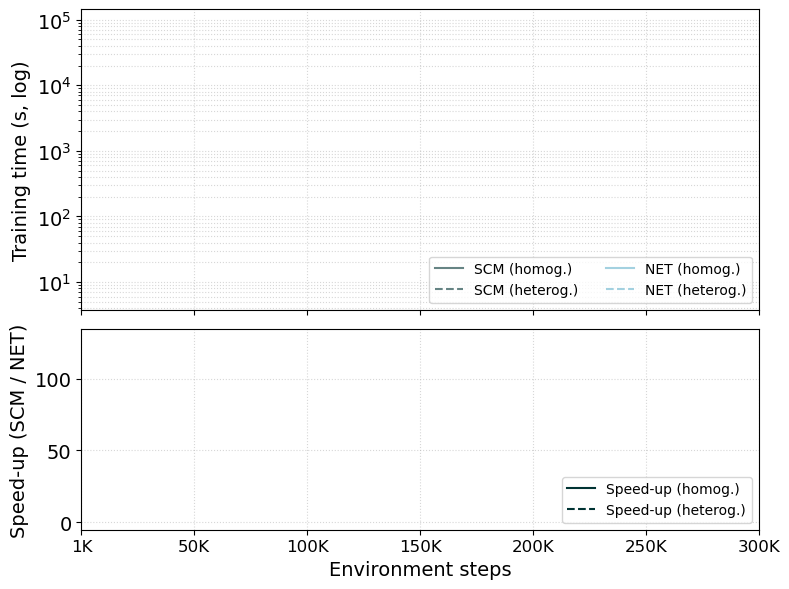

In [17]:
fig, axes = plot_training_time_and_speedup(
    homogenous_scm_training_time,
    homogenous_net_training_time,
    heterogenous_scm_training_time,
    heterogenous_net_training_time,
    cmap="ocean",
    savefig="plots/training_time_comparison_both_on_same_axes.pdf",
    xmax=300_000,
)

### 2.2 Reward over training steps

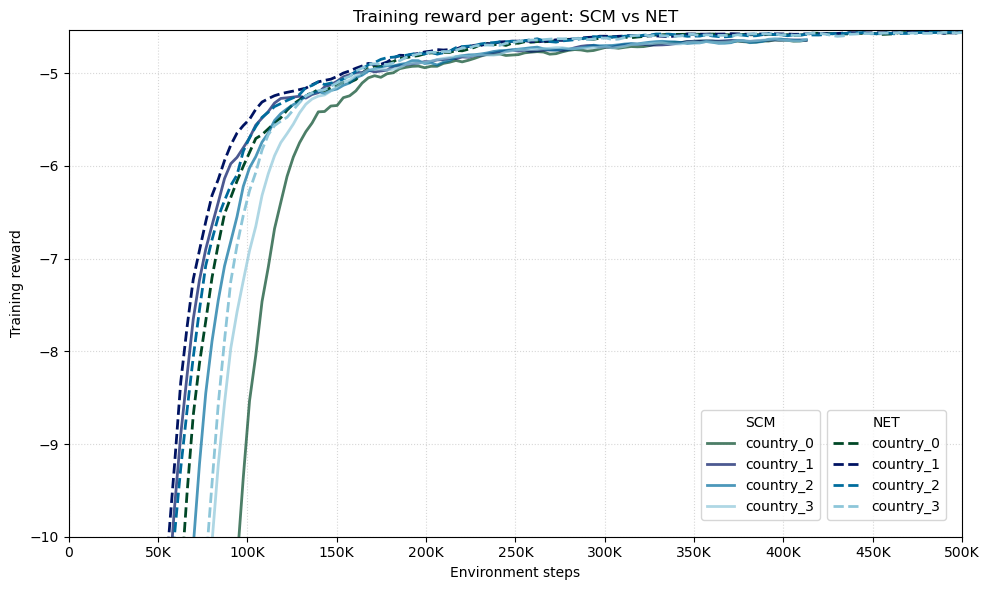

In [18]:
plot_train_reward(homogenous_scm_train_reward, homogenous_net_train_reward, steps_max=500_000,cmap="ocean", y_min = -10)

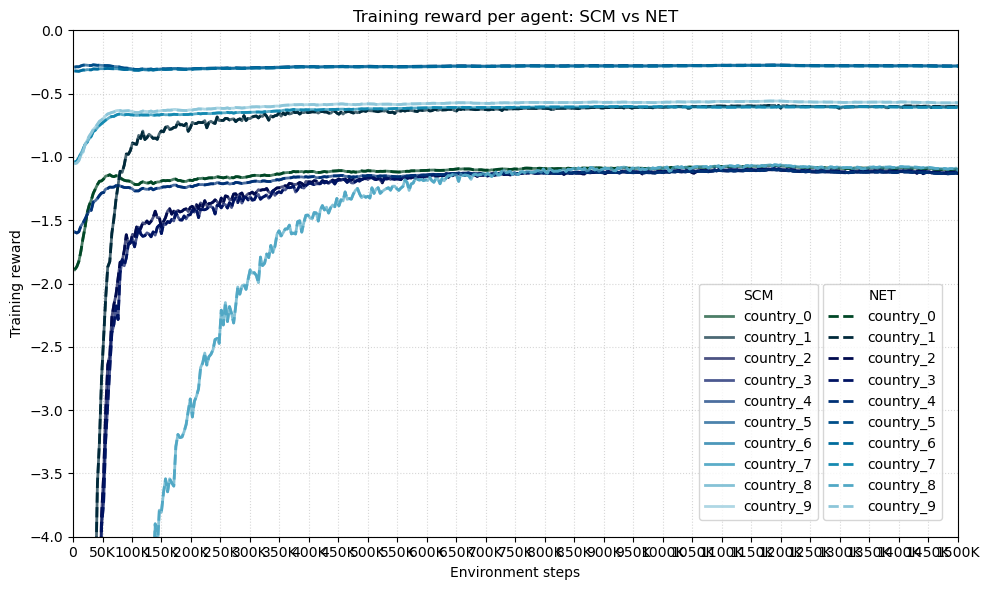

In [20]:
plot_train_reward(heterogenous_scm_train_reward, heterogenous_net_train_reward, steps_max=1_500_000,cmap="ocean", y_min= -4, y_max=0)

### 2.3 Policy consistency

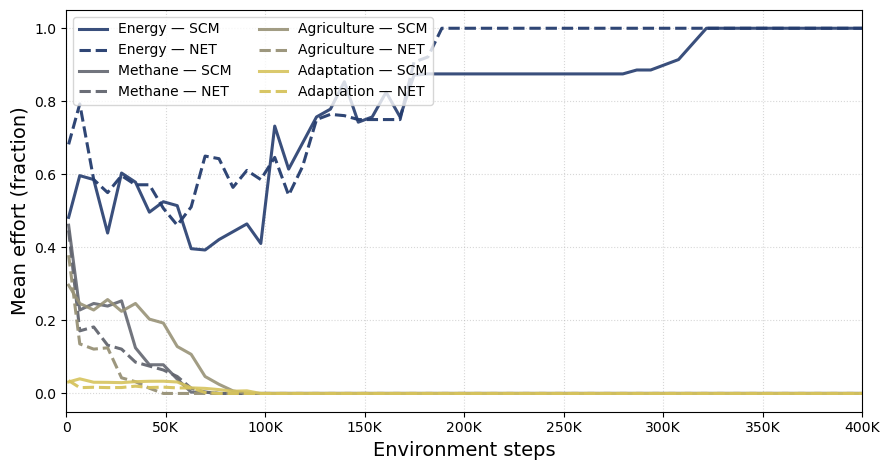

In [21]:
lever_series = {
    "energy": (homogenous_scm_energy, homogenous_net_energy),
    "methane": (homogenous_scm_methane, homogenous_net_methane),
    "agriculture": (homogenous_scm_agriculture, homogenous_net_agriculture),
    "adaptation": (homogenous_scm_adaptation, homogenous_net_adaptation),
}


# plot_lever_consistency(
#     lever_data=lever_series,
#     action_mask=[1, 1, 1, 1],      # choose the levers you want to show
#     agent_mask=[1, 1, 1, 1],       # choose which agents to include
#     steps_max=400_000,
#     cmap="ocean",
#     savefig="plots/homogenous_lever_consistency.pdf",
# )

fig, ax = plot_lever_consistency_mean(
    lever_series,
    agent_mask=[1,1,1,1],           # include all agents
    action_mask=[1,1,1,1],          # include all levers
    steps_max=400_000,
    smooth_window=0,             # optional smoothing
    savefig="plots/lever_mean_consistency.png",
)

(<Figure size 800x1200 with 4 Axes>,
 array([<Axes: ylabel='Energy (fraction)'>,
        <Axes: ylabel='Methane (fraction)'>,
        <Axes: ylabel='Agriculture (fraction)'>,
        <Axes: xlabel='Environment steps', ylabel='Adaptation (fraction)'>],
       dtype=object))

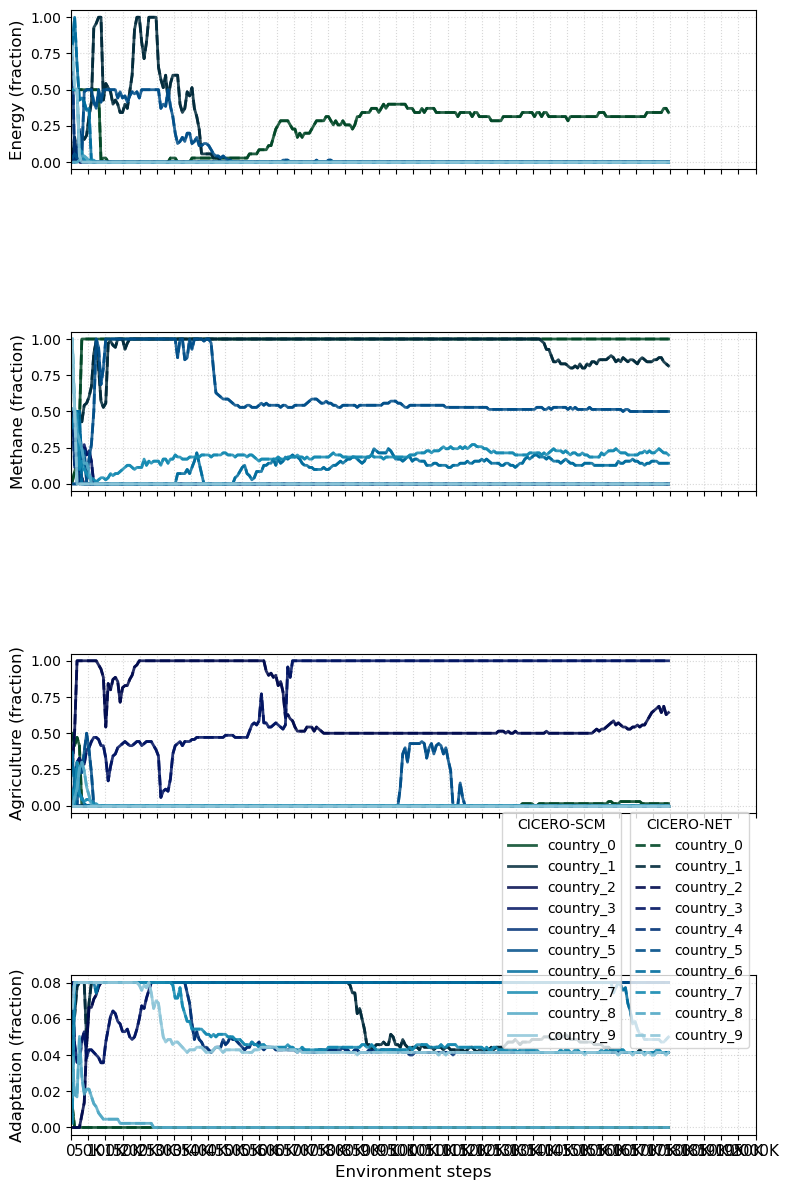

In [22]:
lever_series = {
    "energy": (heterogenous_scm_energy, heterogenous_net_energy),
    "methane": (heterogenous_scm_methane, heterogenous_net_methane),
    "agriculture": (heterogenous_scm_agriculture, heterogenous_net_agriculture),
    "adaptation": (heterogenous_scm_adaptation, heterogenous_net_adaptation),
}


plot_lever_consistency(
    lever_data=lever_series,
    action_mask=[1, 1, 1, 1],      # choose the levers you want to show
    agent_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],       # choose which agents to include
    steps_max=2_000_000,
    cmap="ocean",
    savefig="plots/heterogenous_lever_consistency.pdf",
)


### Compare CICERO VS SURROGATE

In [ ]:
run_dir = Path("/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/20251003_165457_20251001_104419_lstm_128_1_homogenous_agents")
results = compute_scm_for_random_episodes(run_dir, n_samples=1, seed=42)

CICERO-SCM episodes: 100%|██████████| 1/1 [00:24<00:00, 24.04s/episode]


In [65]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

T_net_all = np.concatenate([sample["T_net"] for sample in results])
T_scm_all = np.concatenate([sample["T_scm"] for sample in results])

rmse = np.sqrt(mean_squared_error(T_net_all, T_scm_all))
r2 = r2_score(T_net_all, T_scm_all)
print(f"Global RMSE across {len(results)} episodes: {rmse:.6f} K")
print(f"Global R^2 across {len(results)} episodes: {r2:.6f}")

Global RMSE across 1 episodes: 0.000704 K
Global R^2 across 1 episodes: 0.999983
